---
title: "Accuracy"
author: "Alape Aniruddha"
format:
  html:
    theme: theme.scss
    toc: true
    html-math-method: katex
---


## What is Accuracy?

Accuracy is a metric for evaluating the performance of a classification algorithm. It can be understood as the fraction of predictions the model performed correctly.

$$\displaystyle \text{Accuracy} \ =\ \frac{\text{No of correct predictions}}{\text{Total number of predictions}}$$

## Calculating accuracy for Binary Classification problems
</br>
$$\displaystyle \text{Accuracy} \ =\ \frac{\text{TP + TN}}{\text{TP + FP +TN + FN}}$$

</br>

Where,
TP = True Positives
FP = False Positives
TN = True Negatives
FN = False Negatives

## Issues with using Accuracy



*   In an imbalaced dataset i.e when one class significantly outnumbers the other, if the model predicts the majority class all the time, we get a high accuracy but we know that the model can not be used





## Accuracy in imbalanced dataset

Consider a dataset on 100 individuals where we would like to predict if an individual is suffering from cancer.

The dataset contains 90 individuals who do not suffer from cancer (class 0) whereas 10 of them who do (class 1). If we build a model that always predicts class 0, then our model will never be able to predict that an individual might be suffering from cancer. So, we establish that this is a bad model.

However based on the definition of accuracy, $$\displaystyle \text{Accuracy} \ =\ \frac{90}{100} = 0.9$$

From this, we can see that we would have to use other metrics when we have imbalanced datasets

## Accuracy in sklearn

link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

To calculate accuracy using sklearn, we use the **accuracy_score** function from the module **sklearn.metrics**

The parameters are as follows:
<br>

*   y_true : Ground truth (correct) labels.
*   y_pred : Predicted labels, as returned by a classifier.
*   normalize (True) : If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.
*   sample_weight (None) : Sample weights.









In [ ]:
from sklearn.metrics import accuracy_score

y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]

accuracy_score(y_true, y_pred)

0.5

In [ ]:
#normalize=False gives the count of correctly classified samples

accuracy_score(y_true, y_pred, normalize=False)

2

In [ ]:
#Sample weights can be varied for each point

accuracy_score(y_true, y_pred, sample_weight=[0,0,0,1])

1.0

In [ ]:
#To view a simplified version of the documentation in colab environment
accuracy_score?

## Accuracy on a real word dataset

We are going to calculate the accuracy of a KNN classifier model on the breast_cancer dataset using sklearn.

The dataset does not have any categorical variables and we will just split the dataset into train and test. We shall fit the model on the training dataset and find the accuracy on the test dataset.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X,y = load_breast_cancer(return_X_y=True,as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.965034965034965

In [ ]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.965034965034965

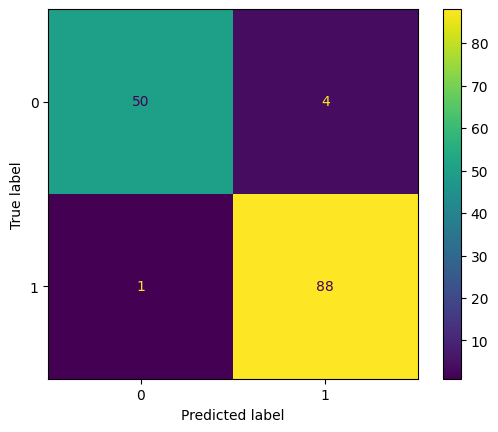

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In the above matrix, we can see that: TP = 88, TN = 50, FP = 4, FN = 1

\begin{aligned}
{\displaystyle \text{Accuracy}} & ={\displaystyle \frac{\text{TP + TN}}{\text{TP + FP +TN + FN}}}\\
 & \\
 & {\displaystyle =\frac{\text{88 + 50}}{\text{88 + 4 + 50 + 1}}}\\
 & \\
 & {\displaystyle =\ \frac{\text{138}}{\text{143}}}\\
 & \\
 & {\displaystyle =\ 0.965}
\end{aligned}

## Tuning for accuracy

We use GridSearchCV for hyperparameter tuning and cross validation. We can change the scoring metric to tune the model as per our requirement.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':[3,5,10,20]}

model_tuned = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param_grid,scoring='accuracy')
model_tuned.fit(X_train,y_train)

model_tuned.score(X_test,y_test)

0.972027972027972

## Notes

*   The value of accuracy required by a model varies by use case
*   Accuracy can often be a misleading metric